In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_moons
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    f1_score,
    normalized_mutual_info_score
)
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
X , y = make_moons(n_samples=500, noise=0.0875, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

In [23]:
dbscan = DBSCAN(eps=0.3, min_samples=25)

agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage="complete"
)

In [24]:
pred_dbscan = dbscan.fit_predict(X)
pred_agglo = agglo.fit_predict(X)

In [25]:
def purity_score(y_true, y_pred):
    matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

# Evaluation aller Metriken
def evaluate_all(X, y_true, y_pred):
    sil = silhouette_score(X, y_pred)
    db = davies_bouldin_score(X, y_pred)
    ch = calinski_harabasz_score(X, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')  # Vorsicht: Nur sinnvoll bei gemappten Labels
    purity = purity_score(y_true, y_pred)
    return {
        "Silhouette": sil,
        "Davies-Bouldin": db,
        "Calinski-Harabasz": ch,
        "ARI": ari,
        "F1 (macro)": f1,
        "NMI": nmi,
        "Purity": purity
    }

# Beispiel-Aufruf:
metrics_a = evaluate_all(X, y, pred_agglo)
metrics_d = evaluate_all(X, y, pred_dbscan)

# Ergebnisse anzeigen
print("K-Means:\n", metrics_a)
print("DBSCAN:\n", metrics_d)

K-Means:
 {'Silhouette': 0.44312813885855645, 'Davies-Bouldin': 0.7654346854103311, 'Calinski-Harabasz': 536.758623879013, 'ARI': 0.37839398300570665, 'F1 (macro)': 0.1610738255033557, 'NMI': 0.4341348361789995, 'Purity': np.float64(0.808)}
DBSCAN:
 {'Silhouette': 0.3294706546506378, 'Davies-Bouldin': 1.1541154156961615, 'Calinski-Harabasz': 329.55100276176455, 'ARI': 1.0, 'F1 (macro)': 0.0, 'NMI': 1.0, 'Purity': np.float64(1.0)}


ValueError: Unknown format code 'f' for object of type 'str'

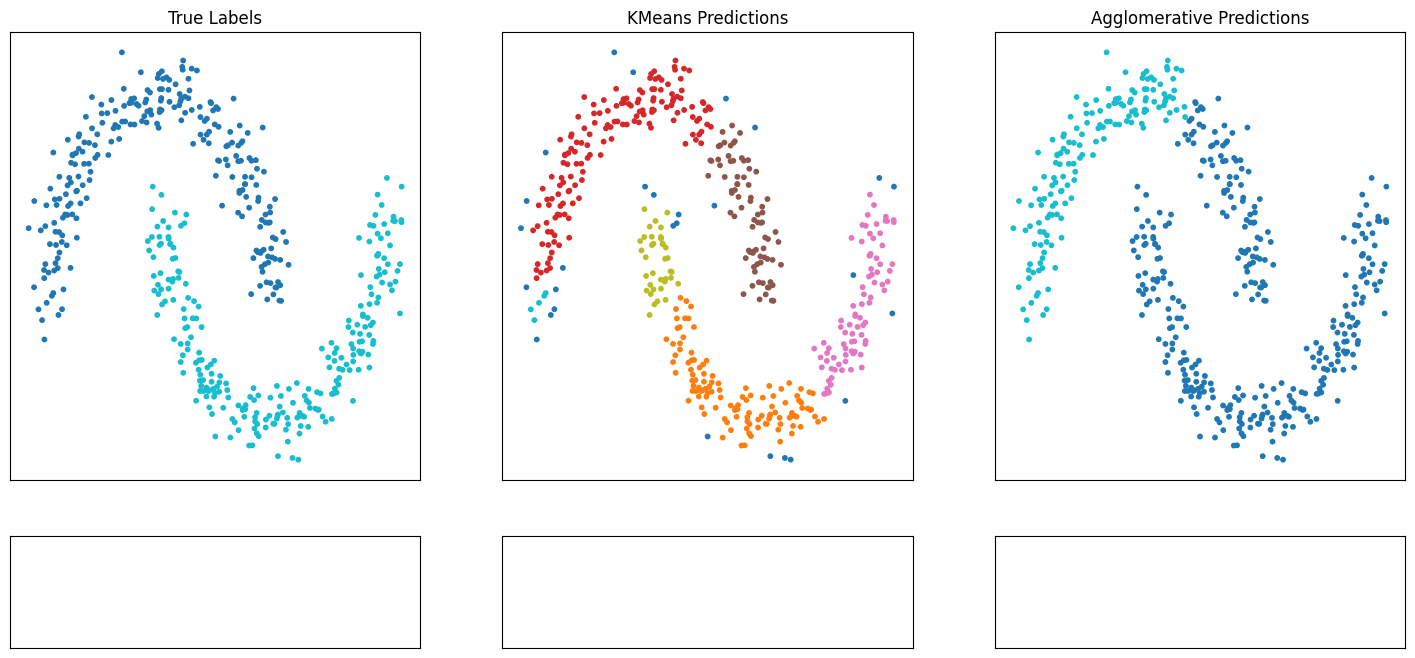

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8), gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=True)

axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=10)
axes[0, 0].set_title("True Labels")

axes[0, 1].scatter(X[:, 0], X[:, 1], c=pred_dbscan, cmap='tab10', s=10)
axes[0, 1].set_title("DBSCAn Predictions")

axes[0, 2].scatter(X[:, 0], X[:, 1], c=pred_agglo, cmap='tab10', s=10)
axes[0, 2].set_title("Agglomerative Predictions")

for ax in axes[0, :]:
    ax.set_xticks([])
    ax.set_yticks([])

labels = ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "ARI", "F1", "NMI", "Purity"]

text_dbscan = "\n".join([f"{lbl}: {val:.3f}" for lbl, val in metrics_d.items()])
text_agglo = "\n".join([f"{lbl}: {val:.3f}" for lbl, val in metrics_a.items()])

axes[1, 0].axis('off')  
axes[1, 1].axis('off')
axes[1,2].axis('off')

axes[1, 1].text(0.5, 0.5, text_dbscan, fontsize=10, ha='center', va='center')
axes[1, 2].text(0.5, 0.5, text_agglo, fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()